# Расчетно-графическая работа
### Криволинейные координаты. Метрический Тензор. Тензорный анализ
- Выполнил: **Савчук Д.И.**
- Вариант: **20**
- Группа: **М8О-103М-20**
- Преподаватель: **Медведев С.В., Поповкин А.В.**
- Дата сдачи: **05.12.20**
___
**Москва, 2020**

### Постановка задачи
Заданы преобразование координат на плоскости ($x$, $y$ - декартовы координаты, $x^1$, $x^2$ - криволинейные координаты) и компоненты вектора скорости в декартовых координатах.
$$x = x^1 + (x^2)^3, y = x^2; \nu_x = 3y^2, \nu_y = 1$$

### Решение
Импорт нужных для работы программы модулей

In [2]:
%matplotlib inline
import numpy as np
import sympy as sp
from sympy.interactive import printing
from matplotlib import pyplot as plt
printing.init_printing(use_latex=True)

x, y, z, t = sp.symbols('x y z t')
X, Y, Z = sp.symbols('X Y Z')
vx, vy, c = sp.symbols('vx vy c')

Введение заданных параметров, где $X = x^1, Y = x^2$:

In [3]:
xx = X + Y**3
yy = Y
v_x = 3 * y**2
v_y = 1

1. 	Указать область плоскости, в которой преобразование координат взаимнооднозначно.<br>
- Взаимная однозначность декартовых координат через криволинейные на $\mathbb{R}x\mathbb{R}$.

In [4]:
q = {x: xx, y: yy}
v = {vx: v_x, vy: v_y}

eq1 = sp.Eq(x, q[x])
eq2 = sp.Eq(y, q[y])
eq3 = sp.Eq(vx, v[vx])
eq4 = sp.Eq(vy, v[vy])

display(eq1, eq2, eq3, eq4)

Криволинейные через декартовые координаты

In [5]:
Q = sp.solve([eq1, eq2], [X, Y])

eQ1 = sp.Eq(X, Q[0][0])
eQ2 = sp.Eq(Y, Q[0][1])

display(eQ1, eQ2)

2. Построить координатную сетку на плоскости

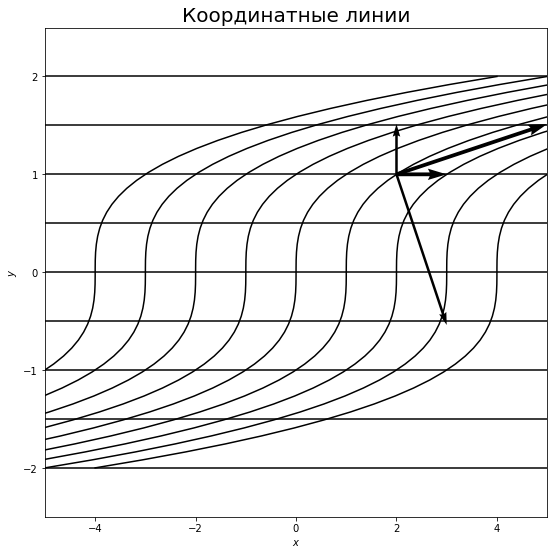

In [6]:
YY = np.linspace(-2, 2)
XX = np.linspace(-2, 2)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
#ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-2.5,2.5)
plt.title('Координатные линии',fontsize=20)

for i in range(-4, 5):
    plt.plot(i + YY**3, YY, color='black')
    plt.plot(YY**3, i/2*np.ones(50), color='black')
    
plt.quiver(2, 1, 1, 0, scale=10, color='black')    # э1
plt.quiver(2, 1, 3, 1, scale=10, color='black')    # э2
plt.quiver(2, 1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(2, 1, 0, 1, scale=10, color='black', width=0.005)    # Э2

3. Найти векторы основного и взаимного базисов. Изобразить их в какой-либо точке координатной сетки в каждом квадранте.<br>
Основной базис:<br>
$$\overrightarrow {э_i} = \frac{\partial \overrightarrow{r}}{\partial x^i}$$
тогда
$$э_1 = \left(\frac{\partial x}{\partial x^1}, \frac{\partial y}{\partial x^1}\right)$$

In [7]:
e1 = [sp.diff(q[x], X), sp.diff(q[y], X)]
display(e1)

$$э_2 = \left(\frac{\partial x}{\partial x^2}, \frac{\partial y}{\partial x^2}\right)$$

In [8]:
e2 = [sp.diff(q[x], Y), sp.diff(q[y], Y)]
display(e2)

Построение векторных полей

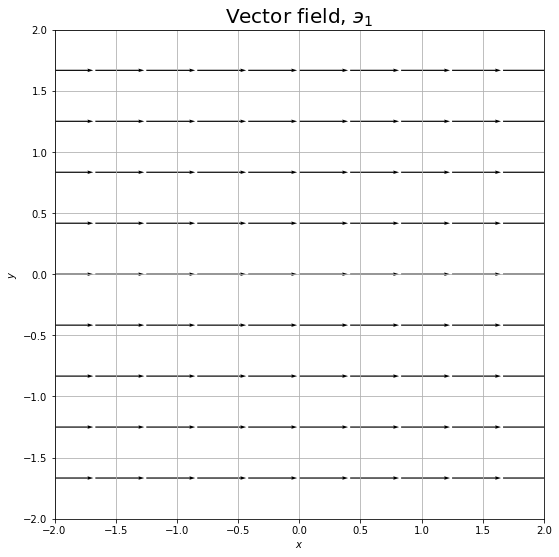

In [9]:
grid_x, grid_y = np.meshgrid(np.linspace(-5,5,25),np.linspace(-5,5,25))

U = int(e1[0])
V = int(e1[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plt.quiver(grid_x, grid_y, U, V, scale=10, color='black')

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Vector field, $э_1$',fontsize=20)
plt.grid()
plt.show()

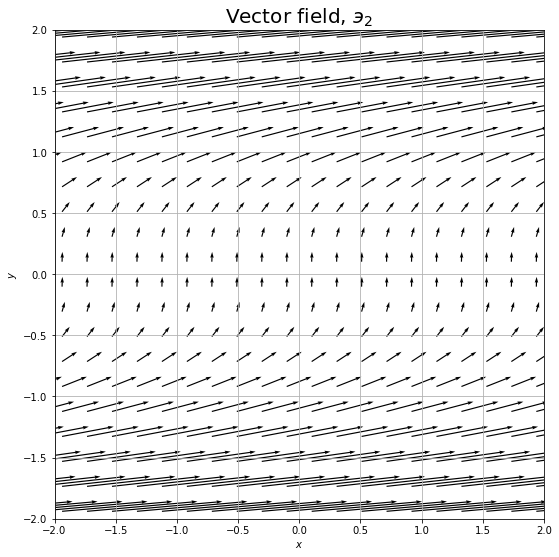

In [10]:
grid_x, grid_y = np.meshgrid(np.linspace(-5,5,50),np.linspace(-5,5,50))

U = 3 * grid_y**2
V = int(e2[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plt.quiver(grid_x, grid_y, U, V, scale=50, color='black')

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Vector field, $э_2$',fontsize=20)
plt.grid()
plt.show()

Взаимный базис:<br>
$$\overrightarrow{э^i} = grad(x^i)$$
тогда
$$э^1 = \left(\frac{\partial x^1}{\partial x}, \frac{\partial x^1}{\partial y}\right)$$

In [11]:
E1 = [sp.diff(Q[0][0], x), sp.diff(Q[0][0], y)]
display(E1)

$$э^2 = \left(\frac{\partial x^2}{\partial x}, \frac{\partial x^2}{\partial y}\right)$$

In [12]:
E2 = [sp.diff(Q[0][1], x), sp.diff(Q[0][1], y)]
display(E2)

Построение векторных полей

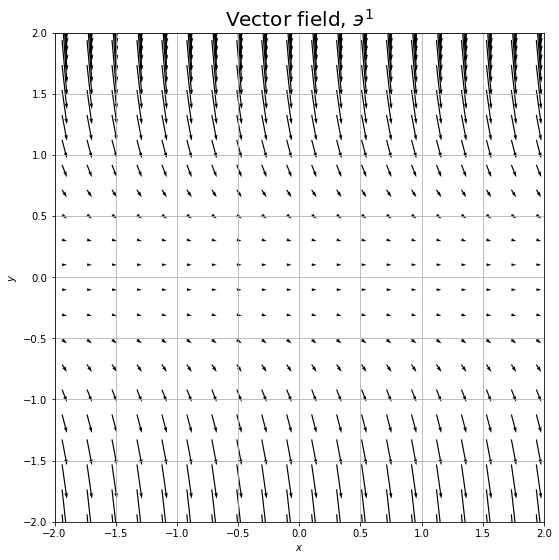

In [13]:
grid_x, grid_y = np.meshgrid(np.linspace(-5,5,50),np.linspace(-5,5,50))

U = int(E1[0])
V = -3 * grid_y**2

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plt.quiver(grid_x, grid_y, U, V, scale=100, color='black')

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Vector field, $э^1$',fontsize=20)
plt.grid()
plt.show()

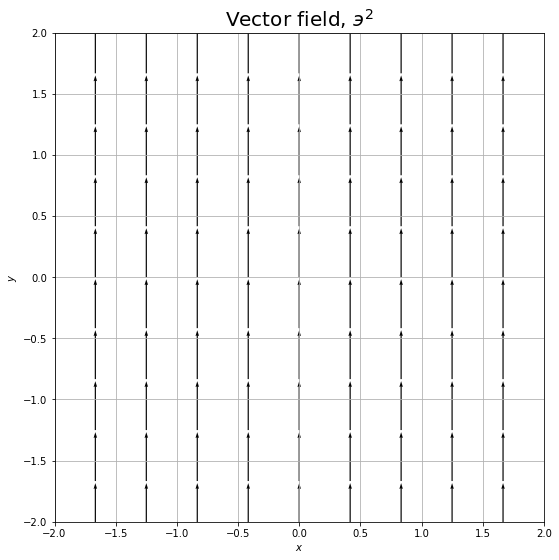

In [14]:
grid_x, grid_y = np.meshgrid(np.linspace(-5,5,25),np.linspace(-5,5,25))

U = int(E2[0])
V = int(E2[1])

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plt.quiver(grid_x, grid_y, U, V, scale=10, color='black')

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Vector field, $э^2$',fontsize=20)
plt.grid()
plt.show()

Найдем основной и взаимный базисы в точке с декартовыми координатами (2, 1):
- основной базис
$$э_1 = \overrightarrow{i}, э_2 = 3(x^2)^2\overrightarrow{i} + \overrightarrow{j} = 3y^2\overrightarrow{i} + \overrightarrow{j};$$
тогда
$$э_1 = \overrightarrow{i}, э_2 = 3\overrightarrow{i} + \overrightarrow{j}$$
- взаимный базис
$$э^1 = \overrightarrow{i} - 3(x^2)^2\overrightarrow{j} = \overrightarrow{i} - 3y^2\overrightarrow{j}, э^2 = \overrightarrow{j};$$
тогда
$$э^1 = \overrightarrow{i} - 3\overrightarrow{j}, э^2 = \overrightarrow{j}$$

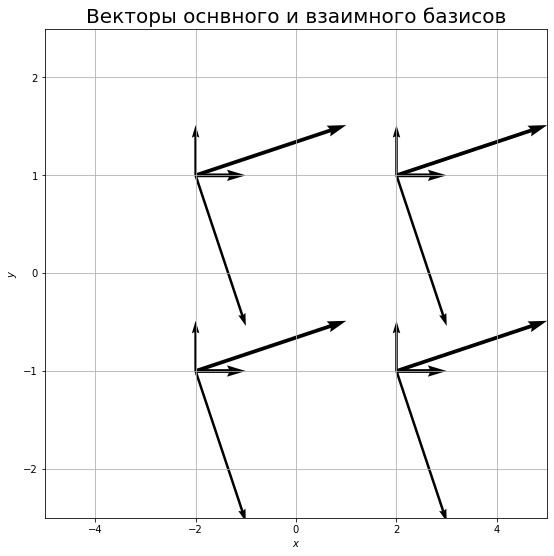

In [15]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
    
plt.quiver(2, 1, 1, 0, scale=10, color='black')    # э1
plt.quiver(2, 1, 3, 1, scale=10, color='black')    # э2
plt.quiver(2, 1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(2, 1, 0, 1, scale=10, color='black', width=0.005)    # Э2

plt.quiver(-2, 1, 1, 0, scale=10, color='black')    # э1
plt.quiver(-2, 1, 3, 1, scale=10, color='black')    # э2
plt.quiver(-2, 1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(-2, 1, 0, 1, scale=10, color='black', width=0.005)    # Э2

plt.quiver(2, -1, 1, 0, scale=10, color='black')    # э1
plt.quiver(2, -1, 3, 1, scale=10, color='black')    # э2
plt.quiver(2, -1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(2, -1, 0, 1, scale=10, color='black', width=0.005)    # Э2

plt.quiver(-2, -1, 1, 0, scale=10, color='black')    # э1
plt.quiver(-2, -1, 3, 1, scale=10, color='black')    # э2
plt.quiver(-2, -1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(-2, -1, 0, 1, scale=10, color='black', width=0.005)    # Э2

#ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-2.5,2.5)
plt.title('Векторы оснвного и взаимного базисов',fontsize=20)
plt.grid()

4. Найти матрицы прямого и обратного преобразования координат

In [16]:
A = sp.Matrix([e1, e2])
print('Матрица прямого преобразования:')
display(A)

Матрица прямого преобразования:


⎡ 1    0⎤
⎢       ⎥
⎢   2   ⎥
⎣3⋅Y   1⎦

Якобиан преобразования $J \ne 0$

In [17]:
J = sp.simplify(A.det())
display(J)

In [18]:
# B = sp.Matrix([Э1, Э2]).T
# or
B = sp.simplify(A**-1)

E1 = [B[0, 0], B[1, 0]]
E2 = [B[0, 1], B[1, 1]]

print('Матрица обратного преобразования:')
display(B)

Матрица обратного преобразования:


⎡  1    0⎤
⎢        ⎥
⎢    2   ⎥
⎣-3⋅Y   1⎦

Проверка правильности найденных матриц:

In [19]:
print('Единичная матрица:')
display(sp.simplify(A*B.subs([(x, q[x]), (y, q[y])])))

Единичная матрица:


⎡1  0⎤
⎢    ⎥
⎣0  1⎦

5. Найти матрицы метрического тензора $\| g_{ij} \|$ и $\| g^{ij} \|$<br>
- Ковариантные компоненты:<br>
$$g_{ij} = э_iэ_j$$
тогда

$$\| g_{ij} \| = 
 \begin{bmatrix}
  э_1э_1 & э_1э_2 \\
 э_2э_1 & э_2э_2 \\
 \end{bmatrix}$$

In [20]:
g = sp.Matrix([[np.array(e1)@np.array(e1), np.array(e1)@np.array(e2)], 
               [np.array(e2)@np.array(e1), np.array(e2)@np.array(e2)]])

print('Матрица метрического тензора:')
display(g)

Матрица метрического тензора:


⎡           2  ⎤
⎢ 1      3⋅Y   ⎥
⎢              ⎥
⎢   2     4    ⎥
⎣3⋅Y   9⋅Y  + 1⎦

- Контравариантные компоненты:<br>
$$g^{ij} = э^iэ^j$$
тогда

$$\| g^{ij} \| = 
 \begin{bmatrix}
  э^1э^1 & э^1э^2 \\
 э^2э^1 & э^2э^2 \\
 \end{bmatrix}$$

In [21]:
G = sp.Matrix([[np.array(E1)@np.array(E1), np.array(E1)@np.array(E2)], 
               [np.array(E2)@np.array(E1), np.array(E2)@np.array(E2)]])

print('Матрица метрического тензора:')
# display(G)
# or
display(sp.simplify(g**-1))

Матрица метрического тензора:


⎡   4          2⎤
⎢9⋅Y  + 1  -3⋅Y ⎥
⎢               ⎥
⎢     2         ⎥
⎣ -3⋅Y       1  ⎦

6. Найти ко- и контравариантные компоненты вектора скорости $\overrightarrow{\nu}$ в криволинейных координатах<br>
- Контравариантные компоненты вектора скорости:

In [22]:
V1 = v[vx]*B[0] + v[vy]*B[2]
V2 = v[vx]*B[1] + v[vy]*B[3]
V1 = sp.simplify(V1.subs([(x, q[x]), (y, q[y])]))
V2 = sp.simplify(V2.subs([(x, q[x]), (y, q[y])]))

display(V1, V2)

- Ковариантные компоненты вектора скорости:

In [23]:
v1 = sp.simplify(g[0]*V1 + g[1]*V2)
v2 = sp.simplify(g[2]*V1 + g[3]*V2)

display(v1, v2)

7. Построить вектор скорости $\overrightarrow{\nu}$ в каждом квадранте

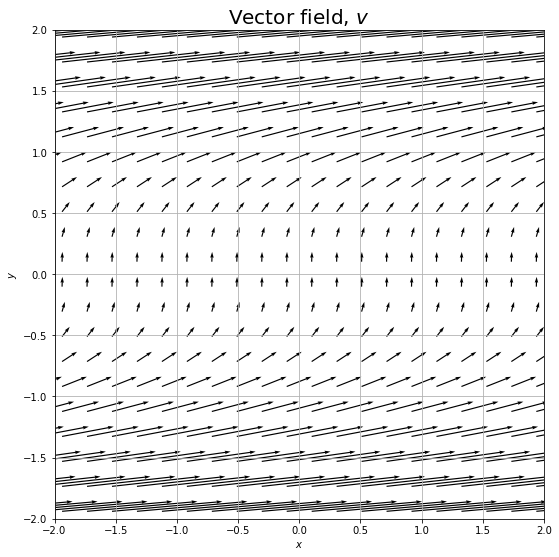

In [24]:
grid_x, grid_y = np.meshgrid(np.linspace(-5,5,50),np.linspace(-5,5,50))

U = 3 * grid_y**2
V = int(v_y)

fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
plt.quiver(grid_x, grid_y, U, V, scale=50, color='black')

ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.title('Vector field, $v$',fontsize=20)
plt.grid()
plt.show()

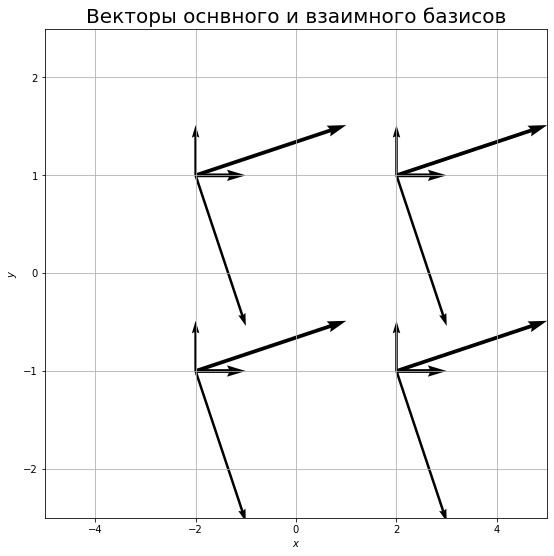

In [25]:
fig = plt.figure(figsize=(9, 9))
ax = fig.add_subplot(111)
    
plt.quiver(2, 1, 1, 0, scale=10, color='black')    # э1
plt.quiver(2, 1, 3, 1, scale=10, color='black')    # э2
plt.quiver(2, 1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(2, 1, 0, 1, scale=10, color='black', width=0.005)    # Э2

plt.quiver(-2, 1, 1, 0, scale=10, color='black')    # э1
plt.quiver(-2, 1, 3, 1, scale=10, color='black')    # э2
plt.quiver(-2, 1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(-2, 1, 0, 1, scale=10, color='black', width=0.005)    # Э2

plt.quiver(2, -1, 1, 0, scale=10, color='black')    # э1
plt.quiver(2, -1, 3, 1, scale=10, color='black')    # э2
plt.quiver(2, -1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(2, -1, 0, 1, scale=10, color='black', width=0.005)    # Э2

plt.quiver(-2, -1, 1, 0, scale=10, color='black')    # э1
plt.quiver(-2, -1, 3, 1, scale=10, color='black')    # э2
plt.quiver(-2, -1, 1, -3, scale=10, color='black', width=0.005)    # Э1
plt.quiver(-2, -1, 0, 1, scale=10, color='black', width=0.005)    # Э2

#ax.set_aspect('equal')
ax.set_xlabel('$x$')
ax.set_ylabel('$y$')
plt.xlim(-5,5)
plt.ylim(-2.5,2.5)
plt.title('Векторы оснвного и взаимного базисов',fontsize=20)
plt.grid()

8. Найти символы Кристоффеля первого и второго рода $Г_{ki,j}$ и $Г^j_{ki}$<br>
- Символ Кристоффеля первого рода:
$$Г_{ki,j} = \frac{1}{2} \left[\frac{\partial g_{ji}}{\partial x^k} + \frac{\partial g_{kj}}{\partial x^i} - \frac{\partial g_{ik}}{\partial x^j}\right]$$

In [23]:
christoffel_1st = []
x_i = sp.Matrix([X, Y])

for j in range(2):
    for k in range(2):
        for i in range(2):
            christoffel_1st.append(sp.simplify(1/2 * (sp.diff(g[j, i], x_i[k]) + sp.diff(g[k, j], x_i[i]) - sp.diff(g[i, k], x_i[j]))))


print('г111, г121, г211, г221, г112, г122, г212, г222')
display(christoffel_1st)

г111, г121, г211, г221, г112, г122, г212, г222


- Символ Кристоффеля второго рода:
$$Г^j_{ki} = \frac{1}{2}g^{js} \left[\frac{\partial g_{is}}{\partial x^k} + \frac{\partial g_{ks}}{\partial x^i} - \frac{\partial g_{ki}}{\partial x^s}\right]$$

In [24]:
christoffel_2nd = []

for j in range(2):
    for k in range(2):
        for i in range(2):
            christoffel_2nd.append(sp.simplify((1/2 * G[j,0] * (sp.diff(g[i,0], x_i[k]) + sp.diff(g[k,0], x_i[i]) - \
                                                  sp.diff(g[k,i], x_i[0])) + 1/2 * G[j,1] * (sp.diff(g[i,1], x_i[k]) + \
                                                  sp.diff(g[k,1], x_i[i]) - sp.diff(g[k,i], x_i[1]))).subs(y, q[y])))


print('Г111, Г121, Г211, Г221, Г112, Г122, Г212, Г222')
display(christoffel_2nd)

Г111, Г121, Г211, Г221, Г112, Г122, Г212, Г222


9. Найти ко- и контравариантные компоненты вектора ускорения $\overrightarrow{w}$ в криволинейных координатах<br>
$$\overrightarrow{w} = w^iэ_i, w^i = \frac{\partial V^i}{\partial t} + V^j \nabla_j V^i$$
где
$$\nabla_j V^i = \frac{\partial V^i}{\partial x^j} + V^k Г^j_{ki}$$
- Контравариантные компоненты вектора ускорения:

In [25]:
W = []
V_nabla = []

V_nabla.append((sp.diff(V1, x_i[0]) + V1*christoffel_2nd[0] + V2*christoffel_2nd[1]).subs([(x, q[x]), (y, q[y])]))    # 11
V_nabla.append((sp.diff(V1, x_i[1]) + V1*christoffel_2nd[2] + V2*christoffel_2nd[3]).subs([(x, q[x]), (y, q[y])]))    # 12
V_nabla.append((sp.diff(V2, x_i[0]) + V1*christoffel_2nd[4] + V2*christoffel_2nd[5]).subs([(x, q[x]), (y, q[y])]))    # 21
V_nabla.append((sp.diff(V2, x_i[1]) + V1*christoffel_2nd[6] + V2*christoffel_2nd[7]).subs([(x, q[x]), (y, q[y])]))    # 22

W.append((sp.diff(V1, t) + V1*V_nabla[0] + V2*V_nabla[1]).subs([(x, q[x]), (y, q[y])]))
W.append((sp.diff(V2, t) + V1*V_nabla[2] + V2*V_nabla[3]).subs([(x, q[x]), (y, q[y])]))

display(W)

- Ковариантные компоненты вектора ускорения:

In [26]:
w1 = sp.simplify(g[0, 0]*W[0] + g[0, 1]*W[1])
w2 = sp.simplify(g[1, 0]*W[0] + g[1, 1]*W[1])

w = [w1, w2]

display(w)

10. Найти дивергенцию и ротор вектора скорости $\overrightarrow{\nu}$<br>
- Дивергенция скорости:
$$div V = \nabla_1 V^1 + \nabla_2 V^2$$

In [27]:
div = V_nabla[0] + V_nabla[3]
display(div)

- Ротор скорости:
$$rot V = \varepsilon^{ijk} \Omega_{ji} э_k$$
где

$$\Omega_{ji} = \frac{1}{2} \left(\nabla_j V_i - \nabla_i V_j \right), \nabla_i V_j = \frac{\partial V_j}{\partial x^i} - V_k Г^k_{ij}$$

Найдем ковариантные производные:
$$\nabla_i V_j = \frac{\partial V_j}{\partial x^i} - V_k Г^k_{ij}$$

In [28]:
v_nabla = []

v_nabla.append(sp.diff(v1, x_i[1]) - (v1*christoffel_2nd[2] + v2*christoffel_2nd[6]))
v_nabla.append(sp.diff(v2, x_i[0]) - (v1*christoffel_2nd[1] + v2*christoffel_2nd[5]))

display(v_nabla)

Альтернированный тензор $(\nabla V)^*$:
$$\Omega_{ji} = \frac{1}{2} \left(\nabla_j V_i - \nabla_i V_j \right)$$

In [29]:
omega_12 = 1/2 * (v_nabla[0] - v_nabla[1])
omega_21 = -omega_12
omega = [omega_12, omega_21]

display(omega)

поскольку все векторы лежат в одной плоскости, ротор будет перпендикулярен ей, и его можно вычислить по формулам:
$$rot V = \varepsilon^{ij3} \Omega_{ji}\overrightarrow{k} = \varepsilon^{123} \Omega_{21}\overrightarrow{k} + \varepsilon^{213} \Omega_{12}\overrightarrow{k} = \Omega_{21}\overrightarrow{k} - \Omega_{12}\overrightarrow{k} = 2 \Omega_{21}\overrightarrow{k}$$

In [30]:
rot = sp.simplify(2*omega_21)
display(rot)

или
$$rot V = \frac{1}{\sqrt{g}} \left(\frac{\partial \nu_2}{\partial x^1} - \frac{\partial \nu_1}{\partial x^2}\right)\overrightarrow{k}$$

In [31]:
rot2 = sp.simplify(1 / sp.sqrt(sp.simplify(g.det())) * (sp.diff(v2, x_i[0]) - sp.diff(v1, x_i[1])))
display(rot2)

11. Получить явные формулы для вычисления градиента и лапласиана скалярной функции $\varphi=\varphi(x^1,x^2)$ в заданных криволинейных координатах<br>
Лапласиан скалярной функции:
$$\Delta \varphi = \nabla^i \nabla_i \varphi$$
Градиент скалярной функции:
$$\nabla_i \varphi = \frac{\partial \varphi}{\partial x^i}э^i = \frac{\partial \varphi}{\partial x^1}э^1 + \frac{\partial \varphi}{\partial x^2}э^2$$
где ковариантные компоненты градиента скаляра:
$$\nabla_1 \varphi = \frac{\partial \varphi}{\partial x^1}э^1, \nabla_2 \varphi = \frac{\partial \varphi}{\partial x^2}э^2$$

$$\nabla \varphi = \left(\frac{\partial \varphi}{\partial x^1}э^1 + \frac{\partial \varphi}{\partial x^2}э^1 \right)\overrightarrow{i} + \left(\frac{\partial \varphi}{\partial x^1}э^2 + \frac{\partial \varphi}{\partial x^2}э^2 \right)\overrightarrow{j} = \left(\frac{\partial \varphi}{\partial x^1}\right)\overrightarrow{i} + \left(-\frac{\partial \varphi}{\partial x^1}3Y^2 + \frac{\partial \varphi}{\partial x^2}\right)\overrightarrow{j}$$

Вычислим ковариантные производные от ковариантых компонент градиента скаляра:
$$\nabla_i \nabla_j \varphi = \frac{\partial}{\partial x^i} \frac{\partial \varphi}{\partial x^j} - \frac{\partial \varphi}{\partial x^k} Г^k_{ij}$$

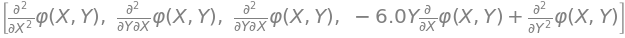

In [32]:
phi = sp.Function('varphi')
nabla2_phi = []

nabla2_phi.append(phi(X,Y).diff(X, 2) - (phi(X,Y).diff(X)*christoffel_2nd[0] + phi(X,Y).diff(Y)*christoffel_2nd[4]))    # 11
nabla2_phi.append(phi(X,Y).diff(Y, X) - (phi(X,Y).diff(X)*christoffel_2nd[2] + phi(X,Y).diff(Y)*christoffel_2nd[6]))    # 21
nabla2_phi.append(phi(X,Y).diff(X, Y) - (phi(X,Y).diff(X)*christoffel_2nd[1] + phi(X,Y).diff(Y)*christoffel_2nd[5]))    # 12
nabla2_phi.append(phi(X,Y).diff(Y, 2) - (phi(X,Y).diff(X)*christoffel_2nd[3] + phi(X,Y).diff(Y)*christoffel_2nd[7]))    # 22

display(nabla2_phi)

тогда
$$\nabla^1 \nabla_1 \varphi = g^{i1} \nabla_i \nabla_1 \varphi = g^{11} \nabla_1 \nabla_1 \varphi + g^{21} \nabla_2 \nabla_1 \varphi$$
$$\nabla^2 \nabla_2 \varphi = g^{i2} \nabla_i \nabla_2 \varphi = g^{12} \nabla_1 \nabla_2 \varphi + g^{22} \nabla_2 \nabla_2 \varphi$$

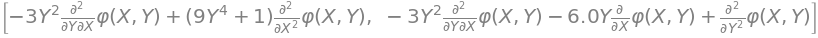

In [33]:
nabla_phi = []

nabla_phi.append((G[0, 0]*nabla2_phi[0] + G[1, 0]*nabla2_phi[1]).subs([(x, q[x]), (y, q[y])]))   # 11
nabla_phi.append((G[0, 1]*nabla2_phi[2] + G[1, 1]*nabla2_phi[3]).subs([(x, q[x]), (y, q[y])]))    # 22
                 
display(nabla_phi)

Лапласиан скалярной функции:
$$\Delta \varphi = \nabla^i \nabla_i \varphi = \nabla^1 \nabla_1 \varphi + \nabla^2 \nabla_2 \varphi$$

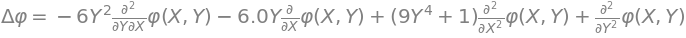

In [34]:
dephi = sp.Symbol('Δφ')
delta_phi = sp.Eq(dephi, sp.simplify(nabla_phi[0] + nabla_phi[1]))
display(delta_phi)

12. Получить явные формулы для вычисления градиента $\nabla \overrightarrow{\nu}$ и лапласиана вектора скорости $\Delta \overrightarrow{\nu}$ в заданных криволинейных координатах<br>
- Градиент вектора скорости:
$$\nabla \overrightarrow{\nu} = \nabla_i \nu^j э^i э_j = \nabla_i \nu_j э^i э^j$$
- Лапласиан вектора скорости:
$$\Delta \overrightarrow{\nu} = \nabla^i \nabla_i \nu^k э_k = \nabla_i \nabla^i \nu^k э_k$$
тогда
$$\nabla_j V^k = \frac{\partial V^k}{\partial x^j} + V^n Г^k_{jn} = \frac{\partial V^k}{\partial x^j} + V^1 Г^k_{j1} + V^2 Г^k_{j2}$$

$$b_1^1 = \nabla_1 V^1 = \frac{\partial V^1}{\partial x^1} + V^1 Г^1_{11} + V^2 Г^1_{12}$$

In [35]:
b11 = sp.diff(V1, x_i[0]) + V1*christoffel_2nd[0] + V2*christoffel_2nd[1]
display(b11)

$$b_2^1 = \nabla_2 V^1 = \frac{\partial V^1}{\partial x^2} + V^1 Г^1_{21} + V^2 Г^1_{22}$$

In [36]:
b21 = sp.diff(V1, x_i[1]) + V1*christoffel_2nd[2] + V2*christoffel_2nd[3]
display(b21)

$$b_1^2 = \nabla_1 V^2 = \frac{\partial V^2}{\partial x^1} + V^1 Г^2_{11} + V^2 Г^2_{12}$$

In [37]:
b12 = sp.diff(V2, x_i[0]) + V1*christoffel_2nd[4] + V2*christoffel_2nd[5]
display(b12)

$$b_2^2 = \nabla_2 V^2 = \frac{\partial V^2}{\partial x^2} + V^1 Г^2_{21} + V^2 Г^2_{22}$$

In [38]:
b22 = sp.diff(V2, x_i[1]) + V1*christoffel_2nd[6] + V2*christoffel_2nd[7]
display(b22)

Найдем контрвариантные компоненты градиента вектора скорости $a^{ik} = g^{ij} \nabla_j V^k$:

$$a^{11} = g^{11} b_1^1 + g^{12} b_1^2$$

In [39]:
a11 = G[0, 0] * b11 + G[0, 1] * b21
display(a11)

$$a^{21} = g^{12} b_1^1 + g^{22} b_2^1$$

In [40]:
a21 = G[0, 1] * b11 + G[1, 1] * b21
display(a21)

$$a^{12} = g^{11} b_1^2 + g^{12} b_2^2$$

In [41]:
a12 = G[0, 0] * b12 + G[0, 1] * b22
display(a12)

$$a^{22} = g^{12} b_1^2 + g^{22} b_2^2$$

In [42]:
a22 = G[0, 1] * b12 + G[1, 1] * b22
display(a22)

Найдем компоненты градиента от градиента вектора скорости  $\nabla^i a^{ik} = \nabla^1 a^{1k} + \nabla^2 a^{2k}$:

$$\nabla^1 a^{11} = \frac{\partial a^{11}}{\partial x^1} + a^{11} Г^1_{11} + a^{21} Г^1_{12}$$

In [43]:
N1 = sp.diff(a11, x_i[0]) + a11 * christoffel_2nd[0] + a21 * christoffel_2nd[1]
display(N1)

$$\nabla^2 a^{21} = \frac{\partial a^{21}}{\partial x^2} + a^{11} Г^2_{12} + a^{21} Г^2_{22}$$

In [44]:
N2 = sp.diff(a21, x_i[1]) + a11 * christoffel_2nd[5] + a21 * christoffel_2nd[7]
display(N2)

$$\nabla^1 a^{12} = \frac{\partial a^{12}}{\partial x^1} + a^{12} Г^1_{11} + a^{22} Г^1_{12}$$

In [45]:
N3 = sp.diff(a12, x_i[0]) + a12 * christoffel_2nd[0] + a22 * christoffel_2nd[1]
display(N3)

$$\nabla^2 a^{22} = \frac{\partial a^{22}}{\partial x^2} + a^{12} Г^2_{12} + a^{22} Г^2_{22}$$

In [46]:
N4 = sp.diff(a22, x_i[1]) + a12 * christoffel_2nd[5] + a22 * christoffel_2nd[7]
display(N4)

Лапласиан вектора скорости:
$$\Delta \overrightarrow{\nu} = (\nabla^1 a^{11} + \nabla^2 a^{21})\overrightarrow{i} + (\nabla^1 a^{12} + \nabla^2 a^{22})\overrightarrow{j}$$

In [47]:
nabla_v = (N1+N2) * sp.Symbol('i') + (N3+N4) * sp.Symbol('j')
display(nabla_v)

$$\Delta \overrightarrow{\nu} = 6 \overrightarrow{i}$$